In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
data, target = load_breast_cancer(return_X_y=True)

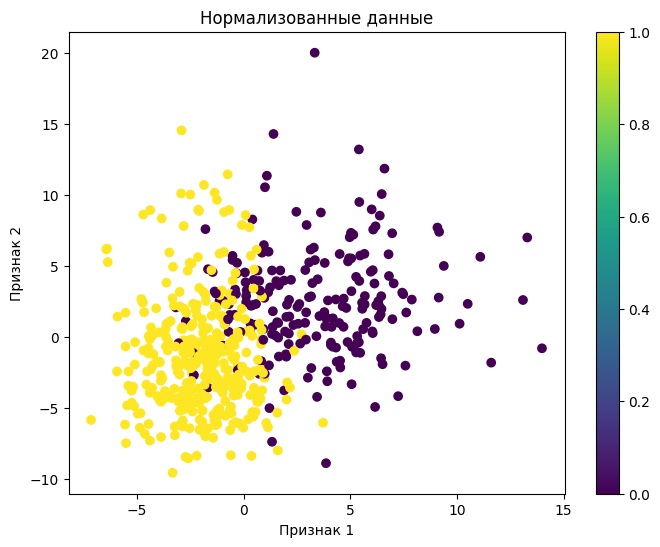

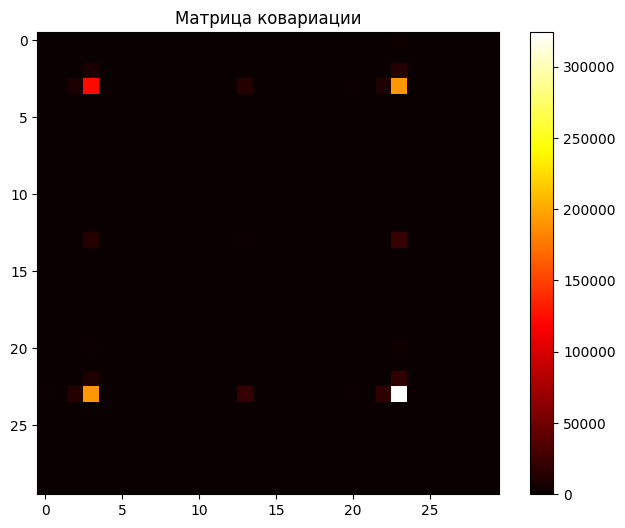

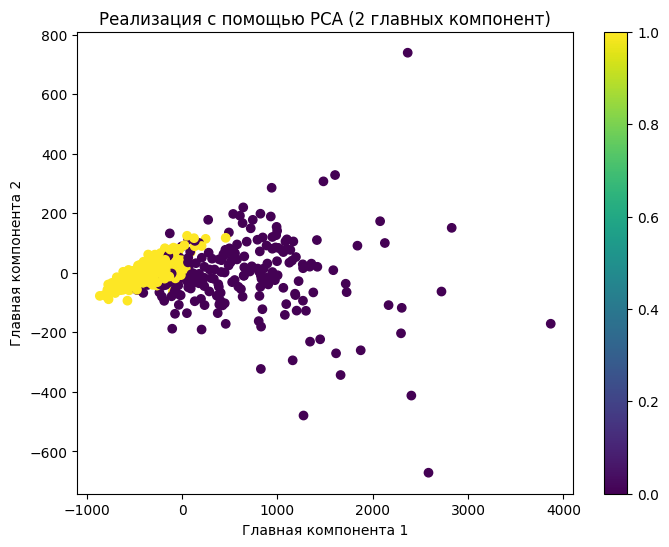

In [2]:
def pca(data, K):
    normalized_data = data - np.mean(data, axis=0)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=target, cmap='viridis')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.title('Нормализованные данные')
    plt.colorbar()
    plt.show()
    
    cov_matrix = np.cov(normalized_data, rowvar=False)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cov_matrix, cmap='hot', interpolation='nearest')
    plt.title('Матрица ковариации')
    plt.colorbar()
    plt.show()
    
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    sorted_indices = np.argsort(eigenvalues)[::-1]
    
    selected_components = eigenvectors[:, sorted_indices[:K]]
    
    reduced_data = np.dot(normalized_data, selected_components)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=target, cmap='viridis')
    plt.xlabel('Главная компонента 1')
    plt.ylabel('Главная компонента 2')
    plt.title('Реализация с помощью PCA ({} главных компонент)'.format(K))
    plt.colorbar()
    plt.show()
    return reduced_data
K = 2
reduced_data = pca(data, K)

In [3]:
from sklearn.decomposition import PCA

In [4]:
data, _ = load_breast_cancer(return_X_y=True)

In [5]:
pca = PCA(n_components=2)

In [6]:
reduced_data_sklearn = pca.fit_transform(data)

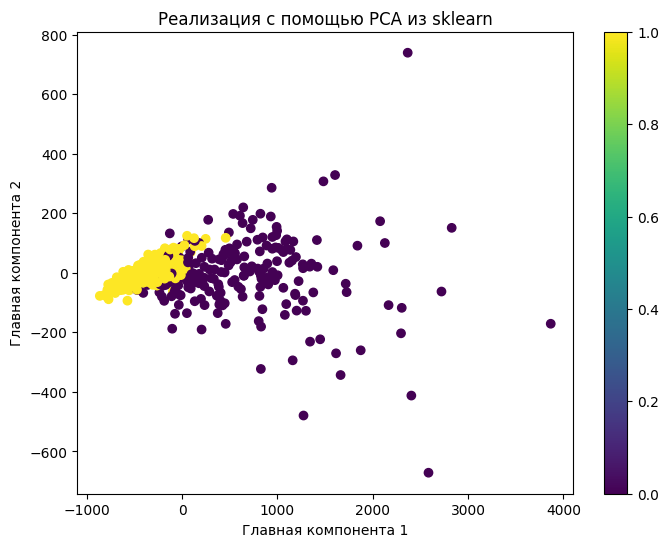

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_sklearn[:, 0], reduced_data_sklearn[:, 1], c=target, cmap='viridis')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Реализация с помощью PCA из sklearn'.format(K))
plt.colorbar()
plt.show()

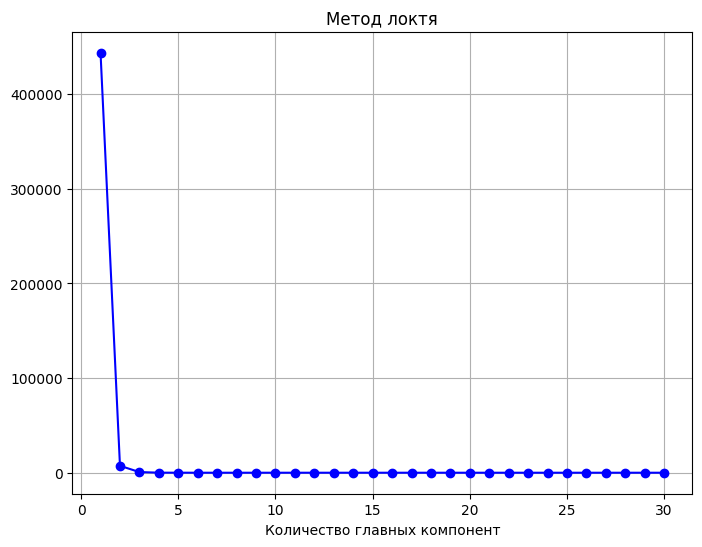

In [8]:
# Ручная реализация и ревлизация при помощи sklearn совпадают
def pca(data):
    normalized_data = data - np.mean(data, axis=0)
    cov_matrix = np.cov(normalized_data, rowvar=False)
    eigenvalues, _ = np.linalg.eig(cov_matrix)
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='b')
    plt.xlabel('Количество главных компонент')
    plt.title('Метод локтя')
    plt.grid()
    plt.show()
pca(data)